In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,8)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg


Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 30.7MB/s]


<Axes: xlabel='DATE'>

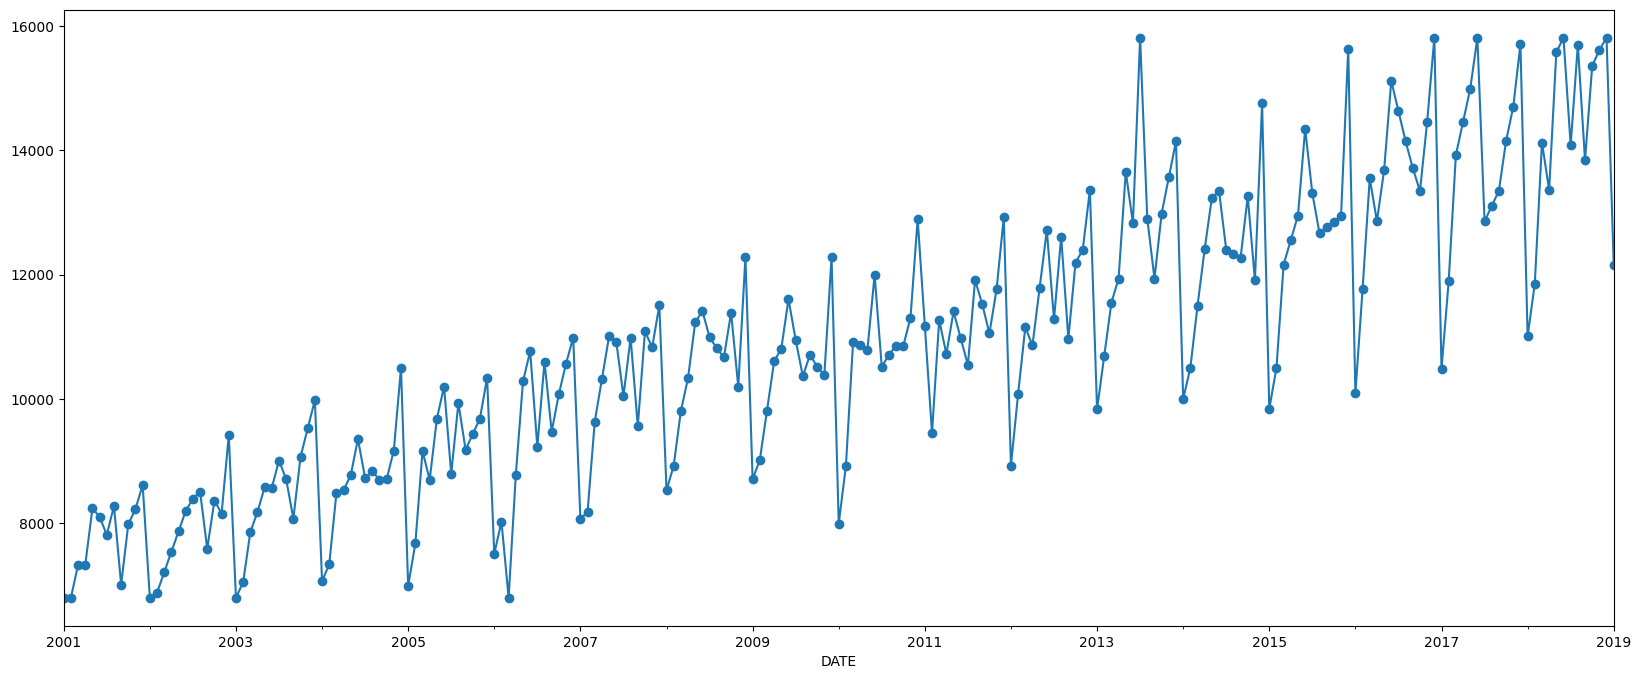

In [ ]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
# set index
mobile_sales.set_index('DATE', inplace=True)
# linear interpolation
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')
# anomalies - clip quantiles
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))
# plot
mobile_sales.Sales.plot(style='-o')

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


<Axes: xlabel='DATE'>

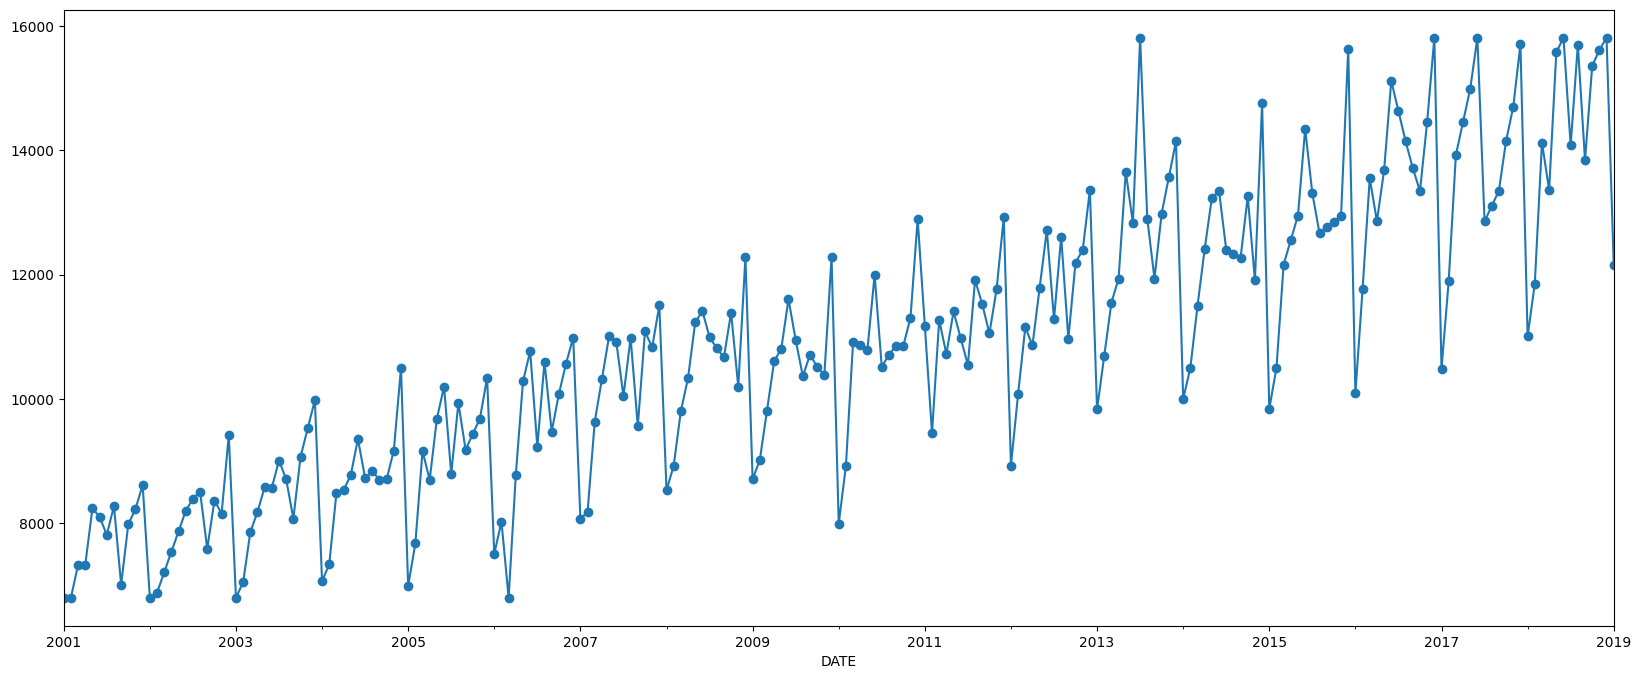

In [ ]:
mobile_sales.Sales.plot(style='-o')

In [ ]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

<Axes: xlabel='DATE'>

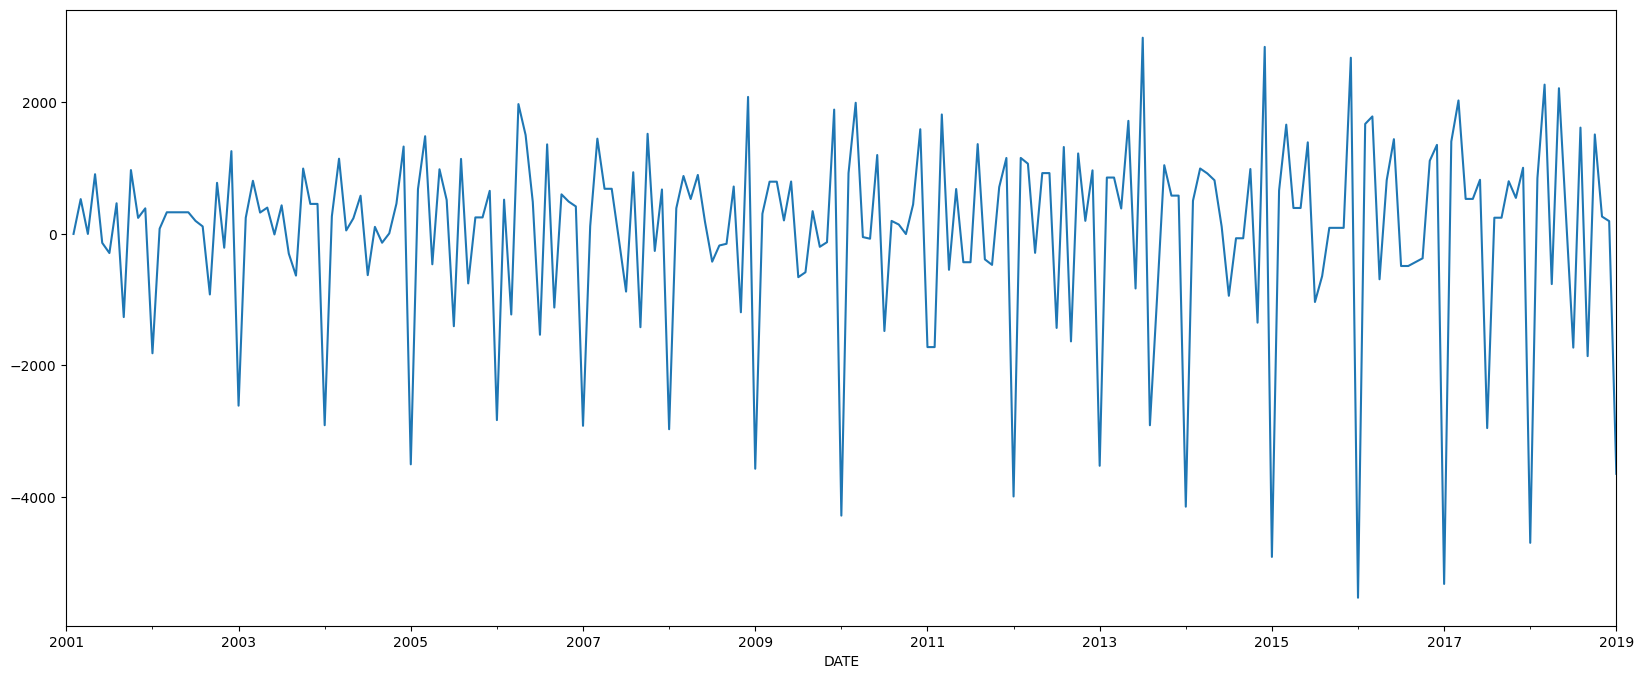

In [ ]:
mobile_sales.Sales.diff(1).plot()

<Axes: xlabel='DATE'>

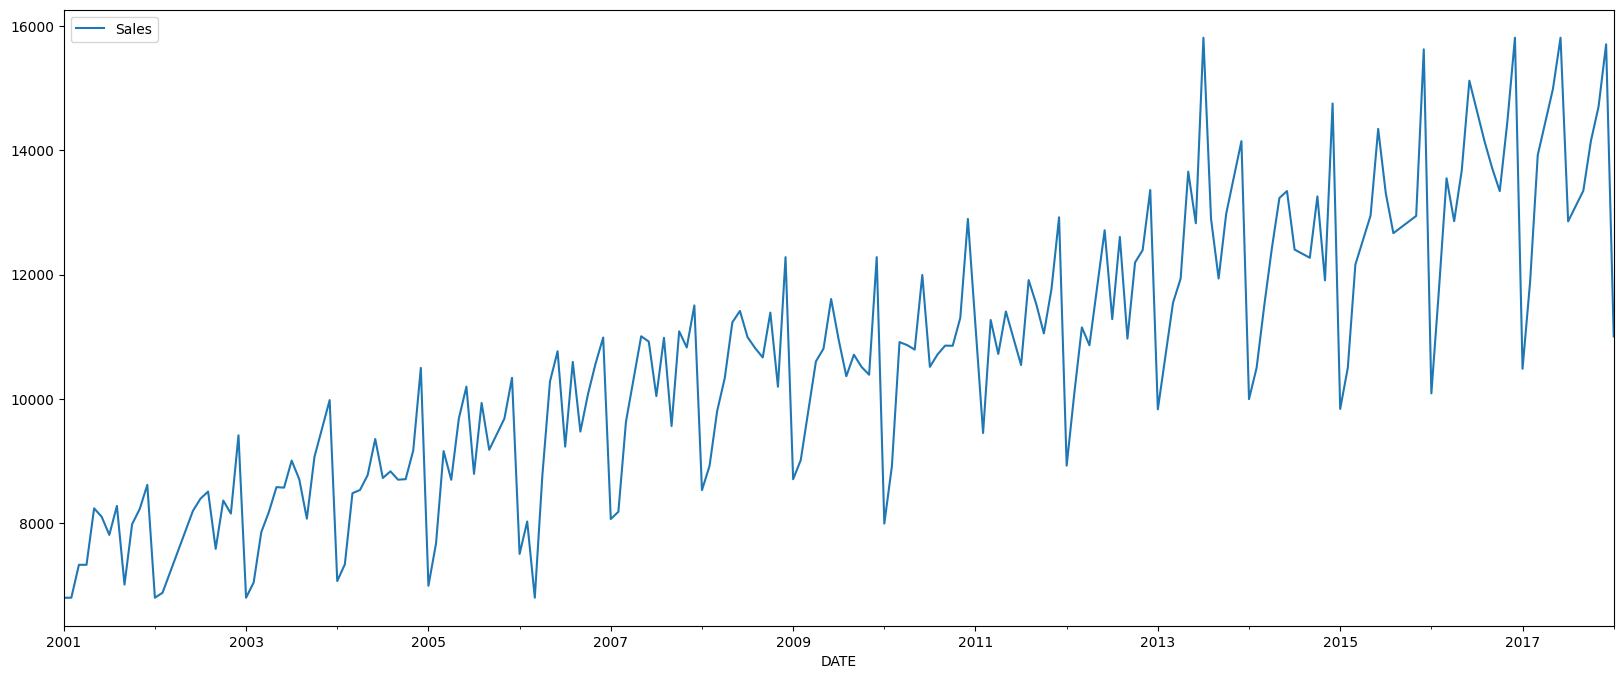

In [ ]:
train_x.plot()

In [ ]:
model = SARIMAX(train_x.Sales, order = (3,1,3), seasonal_order = (1,1,1, 12))

model = model.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
test_x['pred'] = model.forecast(steps=12)

<Axes: xlabel='DATE'>

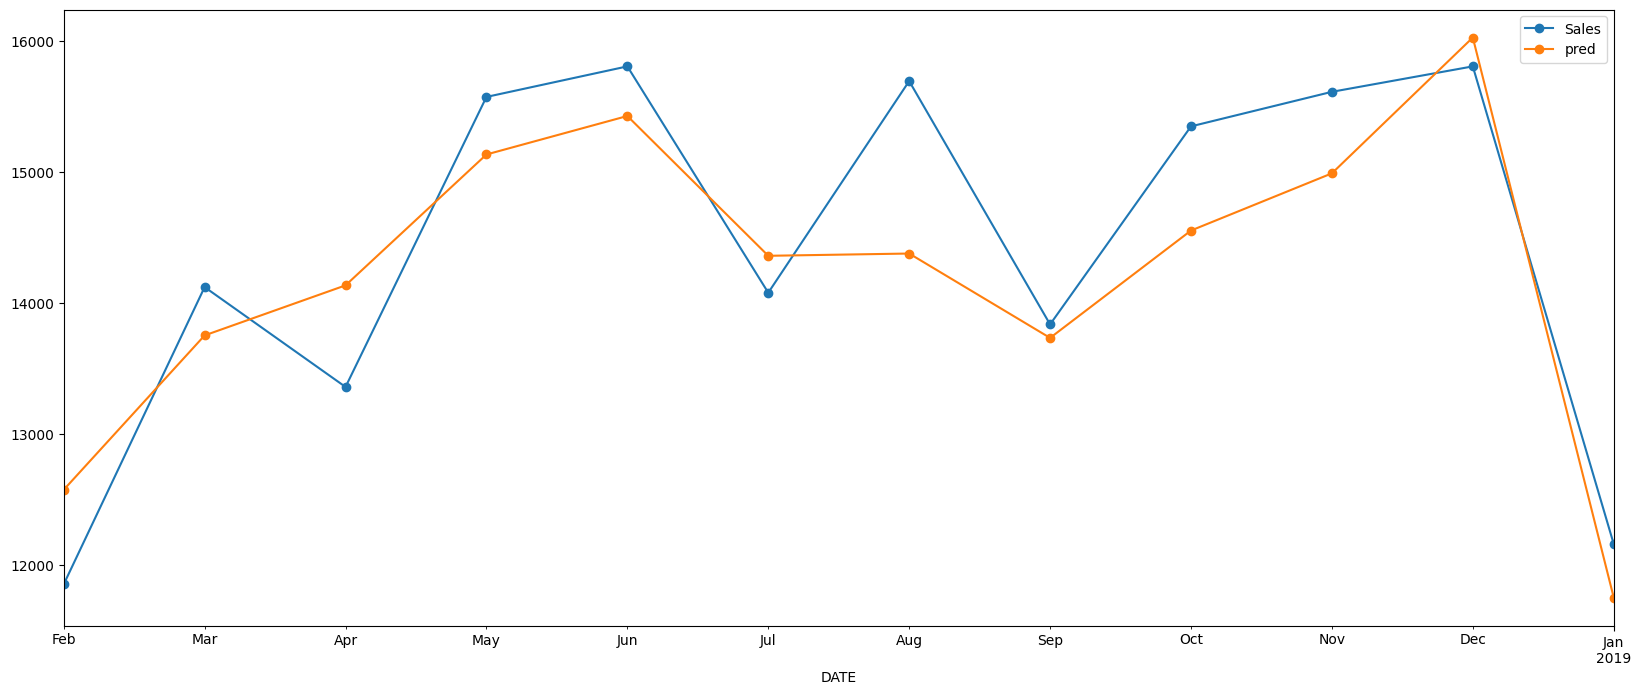

In [ ]:
test_x.plot(style='-o')

In [ ]:
performance(test_x['Sales'], test_x['pred'])

MAE : 536.465
RMSE : 623.233
MAPE: 0.037


In [ ]:
test_x['pred']

,pred
DATE,
2018-02-01,12574.194103
2018-03-01,13753.825599
2018-04-01,14136.205103
2018-05-01,15136.279681
2018-06-01,15430.324896
2018-07-01,14362.090157
2018-08-01,14379.407132
2018-09-01,13734.718480
2018-10-01,14555.045239


In [ ]:
test_x[['lower', 'upper']] = model.get_forecast(steps = 12).conf_int(0.05).values

In [ ]:
test_x

,Sales,pred,lower,upper
DATE,,,,
2018-02-01,11852.0,12574.194103,11007.393367,14140.994839
2018-03-01,14123.0,13753.825599,12138.001424,15369.649774
2018-04-01,13360.0,14136.205103,12513.034851,15759.375355
2018-05-01,15576.0,15136.279681,13507.356945,16765.202418
2018-06-01,15809.4,15430.324896,13800.846218,17059.803573
2018-07-01,14080.0,14362.090157,12730.559266,15993.621048
2018-08-01,15697.0,14379.407132,12744.185366,16014.628898
2018-09-01,13838.0,13734.718480,12099.147441,15370.289519
2018-10-01,15351.0,14555.045239,12916.914574,16193.175904


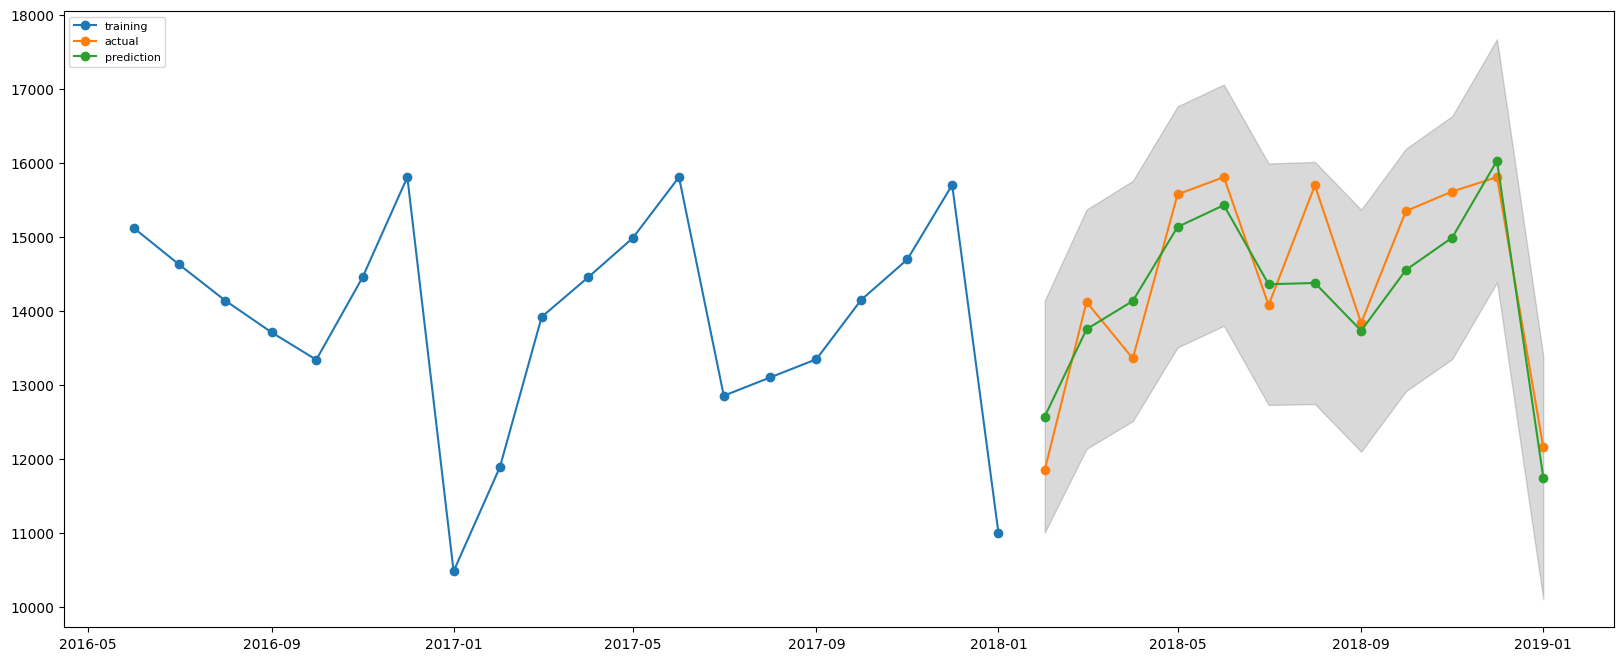

In [ ]:
plt.plot(train_x['Sales'][-20:], '-o', label='training')

plt.plot(test_x['Sales'], '-o', label='actual')

plt.plot(test_x['pred'], '-o', label='prediction')


plt.fill_between(test_x.index, test_x['lower'], test_x['upper'],
                 color='k', alpha=0.15)

plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
model.get_forecast(steps = 1).conf_int(0.05).values

array([[11007.39336719, 14140.99483881]])

In [ ]:
!gdown 16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta


Downloading...
From: https://drive.google.com/uc?id=16TAoRZ3S8ebgIq3dPQmWIXPw_1dZy3ta
To: /content/rest_vis.csv
100% 13.1k/13.1k [00:00<00:00, 35.2MB/s]


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv('rest_vis.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(inplace=True)

# Split into train/test
train = df.iloc[:436]
test = df.iloc[436:]

# SARIMAX model
model = SARIMAX(train['total'], seasonal_order=(1,0,1,7))
results = model.fit()
fc = results.forecast(42)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# Get predictions
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end)

In [ ]:
# SARIMAX with exogenous variables
exog_forecast = test[['holiday']]
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

In [ ]:
## Time Series

In [ ]:
intmdt

,weekend,working_day
date,,
2016-01-01,False,True
2016-01-02,True,False
2016-01-03,True,False
2016-01-04,False,True
2016-01-05,False,True
...,...,...
2017-04-18,False,True
2017-04-19,False,True
2017-04-20,False,True


In [ ]:

# Feature engineering
df["weekday"] = np.where(((df["weekday"] == "Friday") | (df["weekday"] == "Thursday") |
                         (df["weekday"] == "Wednesday") | (df["weekday"] == "Tuesday") |
                         (df["weekday"] == "Monday")), "working_day", "weekend")
intmdt = pd.get_dummies(df['weekday'])
df = pd.concat([df, intmdt], axis=1)

In [ ]:
df

,weekday,holiday,total,weekend,working_day
date,,,,,
2016-01-01,working_day,1,296.0,False,True
2016-01-02,weekend,0,191.0,True,False
2016-01-03,weekend,0,202.0,True,False
2016-01-04,working_day,0,105.0,False,True
2016-01-05,working_day,0,98.0,False,True
...,...,...,...,...,...
2017-04-18,working_day,0,91.0,False,True
2017-04-19,working_day,0,79.0,False,True
2017-04-20,working_day,0,90.0,False,True


In [ ]:
df

,weekday,holiday,total,weekend,working_day
date,,,,,
2016-01-01,working_day,1,296.0,False,True
2016-01-02,weekend,0,191.0,True,False
2016-01-03,weekend,0,202.0,True,False
2016-01-04,working_day,0,105.0,False,True
2016-01-05,working_day,0,98.0,False,True
...,...,...,...,...,...
2017-04-18,working_day,0,91.0,False,True
2017-04-19,working_day,0,79.0,False,True
2017-04-20,working_day,0,90.0,False,True


In [ ]:
# Create lag features
for i in range(1,2):
    df[f"Lag_{i}"] = df['total'].shift(i)

In [ ]:
df

,weekday,holiday,total,weekend,working_day,Lag_1
date,,,,,,
2016-01-01,working_day,1,296.0,False,True,NaN
2016-01-02,weekend,0,191.0,True,False,296.0
2016-01-03,weekend,0,202.0,True,False,191.0
2016-01-04,working_day,0,105.0,False,True,202.0
2016-01-05,working_day,0,98.0,False,True,105.0
...,...,...,...,...,...,...
2017-04-18,working_day,0,91.0,False,True,140.0
2017-04-19,working_day,0,79.0,False,True,91.0
2017-04-20,working_day,0,90.0,False,True,79.0


In [ ]:
# Create lag features
for i in range(1,32):
    df[f"Lag_{i}"] = df['total'].shift(i)

In [ ]:
df

,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_22,Lag_23,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,working_day,1,296.0,False,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,weekend,0,191.0,True,False,296.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,weekend,0,202.0,True,False,191.0,296.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,working_day,0,105.0,False,True,202.0,191.0,296.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,working_day,0,98.0,False,True,105.0,202.0,191.0,296.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-18,working_day,0,91.0,False,True,140.0,253.0,218.0,221.0,70.0,...,98.0,146.0,264.0,154.0,84.0,109.0,55.0,125.0,205.0,179.0
2017-04-19,working_day,0,79.0,False,True,91.0,140.0,253.0,218.0,221.0,...,97.0,98.0,146.0,264.0,154.0,84.0,109.0,55.0,125.0,205.0
2017-04-20,working_day,0,90.0,False,True,79.0,91.0,140.0,253.0,218.0,...,140.0,97.0,98.0,146.0,264.0,154.0,84.0,109.0,55.0,125.0


In [ ]:
lis = [f'Lag_{i}' for i in range(1,32)]


In [ ]:
df.dropna(inplace=True)
df['last_month_avg_level'] = df.loc[:,lis].sum(axis=1)/31

In [ ]:
df

,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_23,Lag_24,Lag_25,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level
date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,working_day,0,94.0,False,True,204.0,225.0,150.0,95.0,105.0,...,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,296.0,143.419355
2016-02-02,working_day,1,100.0,False,True,94.0,204.0,225.0,150.0,95.0,...,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,191.0,136.903226
2016-02-03,working_day,0,72.0,False,True,100.0,94.0,204.0,225.0,150.0,...,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,202.0,133.967742
2016-02-04,working_day,0,97.0,False,True,72.0,100.0,94.0,204.0,225.0,...,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,105.0,129.774194
2016-02-05,working_day,0,147.0,False,True,97.0,72.0,100.0,94.0,204.0,...,65.0,57.0,101.0,212.0,234.0,149.0,69.0,83.0,98.0,129.516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-18,working_day,0,91.0,False,True,140.0,253.0,218.0,221.0,70.0,...,146.0,264.0,154.0,84.0,109.0,55.0,125.0,205.0,179.0,138.967742
2017-04-19,working_day,0,79.0,False,True,91.0,140.0,253.0,218.0,221.0,...,98.0,146.0,264.0,154.0,84.0,109.0,55.0,125.0,205.0,136.129032
2017-04-20,working_day,0,90.0,False,True,79.0,91.0,140.0,253.0,218.0,...,97.0,98.0,146.0,264.0,154.0,84.0,109.0,55.0,125.0,132.064516


In [ ]:
lis = [f'Lag_{i}' for i in range(1,8)]
lis

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7']

In [ ]:

# Create moving averages




df['last_week_avg_level'] = df.loc[:,lis].sum(axis=1)/7

lis = [f"Lag_{i}" for i in range(1,15)]
df['last_2week_avg_level'] = df.loc[:,lis].sum(axis=1)/14

In [ ]:
# Create day of week features
df['dayofweek'] = df.index.dayofweek
df

,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_26,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level,last_week_avg_level,last_2week_avg_level,dayofweek
date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,working_day,0,94.0,False,True,204.0,225.0,150.0,95.0,105.0,...,83.0,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286,139.214286,0
2016-02-02,working_day,1,100.0,False,True,94.0,204.0,225.0,150.0,95.0,...,69.0,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429,136.500000,1
2016-02-03,working_day,0,72.0,False,True,100.0,94.0,204.0,225.0,150.0,...,149.0,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000,136.500000,2
2016-02-04,working_day,0,97.0,False,True,72.0,100.0,94.0,204.0,225.0,...,234.0,149.0,69.0,83.0,98.0,105.0,129.774194,134.285714,134.000000,3
2016-02-05,working_day,0,147.0,False,True,97.0,72.0,100.0,94.0,204.0,...,212.0,234.0,149.0,69.0,83.0,98.0,129.516129,134.571429,133.357143,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-18,working_day,0,91.0,False,True,140.0,253.0,218.0,221.0,70.0,...,84.0,109.0,55.0,125.0,205.0,179.0,138.967742,152.571429,138.714286,1
2017-04-19,working_day,0,79.0,False,True,91.0,140.0,253.0,218.0,221.0,...,154.0,84.0,109.0,55.0,125.0,205.0,136.129032,154.571429,138.142857,2
2017-04-20,working_day,0,90.0,False,True,79.0,91.0,140.0,253.0,218.0,...,264.0,154.0,84.0,109.0,55.0,125.0,132.064516,153.142857,136.785714,3


In [ ]:
df['sale_wrt_dow'] = df.groupby('dayofweek')['total'].transform('mean')

In [ ]:
df

,weekday,holiday,total,weekend,working_day,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,...,Lag_27,Lag_28,Lag_29,Lag_30,Lag_31,last_month_avg_level,last_week_avg_level,last_2week_avg_level,dayofweek,sale_wrt_dow
date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,working_day,0,94.0,False,True,204.0,225.0,150.0,95.0,105.0,...,98.0,105.0,202.0,191.0,296.0,143.419355,135.714286,139.214286,0,89.593750
2016-02-02,working_day,1,100.0,False,True,94.0,204.0,225.0,150.0,95.0,...,83.0,98.0,105.0,202.0,191.0,136.903226,135.571429,136.500000,1,94.531250
2016-02-03,working_day,0,72.0,False,True,100.0,94.0,204.0,225.0,150.0,...,69.0,83.0,98.0,105.0,202.0,133.967742,139.000000,136.500000,2,94.687500
2016-02-04,working_day,0,97.0,False,True,72.0,100.0,94.0,204.0,225.0,...,149.0,69.0,83.0,98.0,105.0,129.774194,134.285714,134.000000,3,99.015625
2016-02-05,working_day,0,147.0,False,True,97.0,72.0,100.0,94.0,204.0,...,234.0,149.0,69.0,83.0,98.0,129.516129,134.571429,133.357143,4,147.171875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-18,working_day,0,91.0,False,True,140.0,253.0,218.0,221.0,70.0,...,109.0,55.0,125.0,205.0,179.0,138.967742,152.571429,138.714286,1,94.531250
2017-04-19,working_day,0,79.0,False,True,91.0,140.0,253.0,218.0,221.0,...,84.0,109.0,55.0,125.0,205.0,136.129032,154.571429,138.142857,2,94.687500
2017-04-20,working_day,0,90.0,False,True,79.0,91.0,140.0,253.0,218.0,...,154.0,84.0,109.0,55.0,125.0,132.064516,153.142857,136.785714,3,99.015625


In [ ]:
# Keep copy of full dataset
dfo = df.copy()

# Select features for modeling
df = df[['total', 'Lag_1', 'last_month_avg_level', 'last_week_avg_level',
         'last_2week_avg_level', 'sale_wrt_dow', 'holiday']]

In [ ]:
df.shape[0]-42

405

In [ ]:
# Split data for linear regression
train = df.iloc[:df.shape[0]-42].dropna()


In [ ]:
test = df.iloc[df.shape[0]-42:]

In [ ]:








train_X = train.drop(["total"],axis=1)
train_y = train['total']
test_X = test.drop(["total"],axis=1)
test_y = test['total']

# Train linear regression
model = LinearRegression()
model.fit(train_X, train_y)
y_pred = pd.Series(model.predict(test_X), index=test.index)

# Plot results
plt.plot(dfo.tail(42)['date'], test_y, '-o', label='actual')
plt.plot(dfo.tail(42)['date'], y_pred, '-o', label='predicted')
for x in dfo[-42:].query('holiday==1')['date']:
    plt.axvline(x=x, color='red', alpha=0.5)
plt.legend()
plt.show()

KeyError: 'date'